## K- Nearest Neighbour Classifier

In [1]:
from sklearn.datasets import load_iris
from pylab import *

In [2]:
import numpy as np

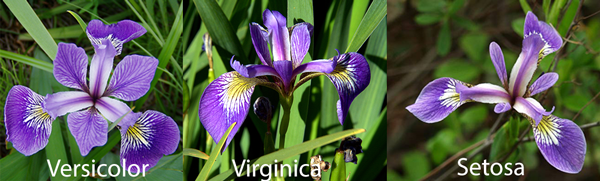

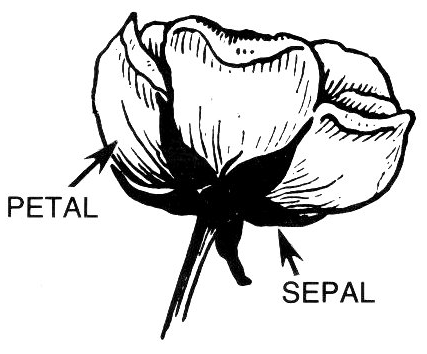

In [3]:
from IPython.display import Image, display

display(Image("irises.png",embed=True))
display(Image("petal_sepal_label.png",embed=True))


In [4]:
data = load_iris()

In [6]:
print data['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
x = lambda i:data['target']==i

In [8]:
target_0 = data['data'][x(0)]
target_1 = data['data'][x(1)]
target_2 = data['data'][x(2)]

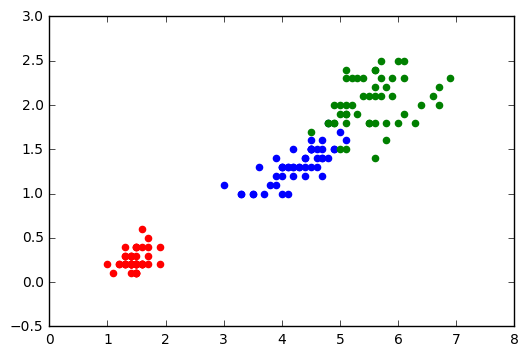

In [9]:
scatter(target_0[:,2],target_0[:,3],color ='R')
scatter(target_1[:,2],target_1[:,3],color ='B')
scatter(target_2[:,2],target_2[:,3],color ='G')
show()

In [10]:
def knn_classifier(inX, dataset, labels, k=4):
    sos = np.array([sum(x) for x in (dataset-inX)**2])
    knn_idx = sos.argsort()[:k]
    knn_labels = list(labels[knn_idx])
    label_counts = [(i,knn_labels.count(i)) for i in set(knn_labels)]
    result = sorted(label_counts,key=lambda x:x[1],reverse=True)[0][0]
    return inX,result
    

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(data['data'],data['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [12]:
test = [ 5.6,  3. ,  .8,  0.3]
print knn_classifier(test,data['data'],data['target'],k=4)
print knn.predict([test])

([5.6, 3.0, 0.8, 0.3], 0)
[0]


## K - Means clustering

In [13]:
def get_range_centroids(dataset,k):
    if len(dataset) == 0:
        return None
    features = dataset.shape[1]
    ranges = [ (max(dataset[:,x]) - min(dataset[:,x]))/k for x in range(features)]
    result = [ [round(ran * (i+1),2) for ran in ranges ]for i in range(k) ]
    return result

In [14]:
from random import choice
def get_rand_centroids(dataset,k):
    return [choice(dataset) for _ in range(k)]
    

In [15]:
def get_avg_centroids(dataset):
    features = dataset.shape[1]
    result = [dataset[:,i].mean() for i in range(features)]
    return result

In [20]:
def get_nearest_centroid(point,centroids):
    distances = np.array([sum((point - center)**2) for center in centroids])
    return distances.argsort()[0]

In [21]:
def kmeans_clusters(dataset,k=3,n=10,seed=get_rand_centroids):
    iteration = 0
    stable = False
    centroids = seed(dataset,k)
    clusters = np.array([])

    while (not stable and n > iteration ):
        #print "Centroids in Iteration {i} is {cen}".format(i = iteration,cen=centroids)
        iteration += 1
        new_clusters = np.array([get_nearest_centroid(row,centroids) for row in dataset])
        if np.array_equal(new_clusters,clusters):
            pass
        clusters = new_clusters.copy()
        
        for c in range(k):
            #print "Recalculating centroid %d"%(c)
            new_center = get_avg_centroids(dataset[clusters==c])
            #print "New co-ordinates for Centroid {it} is {point}".format(it=c,point=new_center)
            if new_center:
                centroids[c] = new_center
    return {'data':dataset,'labels':clusters,'centroids':centroids}
    

In [22]:
original_centroids = [[ds[:,i].mean() for i in range(4)] for ds in [target_0,target_1,target_2]]

[[5.9016129032258071, 2.7483870967741932, 4.3935483870967751, 1.4338709677419355], [5.0060000000000002, 3.4180000000000001, 1.464, 0.24399999999999999], [6.8500000000000005, 3.0736842105263156, 5.7421052631578933, 2.0710526315789473]]


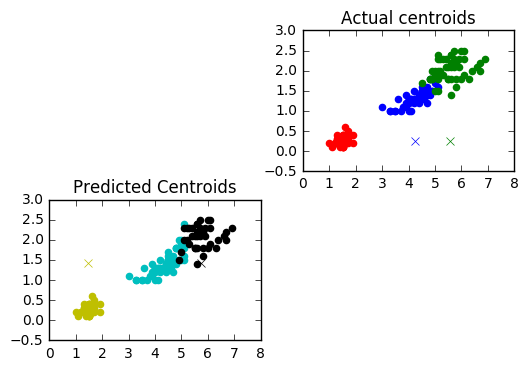

In [24]:
result = kmeans_clusters(data['data'],3,300)
print result['centroids']
y = lambda i:result['labels']==i
cluster_0 = result['data'][y(0)]
cluster_1 = result['data'][y(1)]
cluster_2 = result['data'][y(2)]

subplot(222,title="Actual centroids")
scatter(target_0[:,2],target_0[:,3],color ='R')
scatter(target_1[:,2],target_1[:,3],color ='B')
scatter(target_2[:,2],target_2[:,3],color ='G')
plot(original_centroids[0][2],original_centroids[0][3],'rx')
plot(original_centroids[1][2],original_centroids[0][3],'bx')
plot(original_centroids[2][2],original_centroids[0][3],'gx')

subplot(223, title="Predicted Centroids")
scatter(cluster_0[:,2],cluster_0[:,3],color ='c')
scatter(cluster_1[:,2],cluster_1[:,3],color ='y')
scatter(cluster_2[:,2],cluster_2[:,3],color ='k')   
plot(result['centroids'][0][2],result['centroids'][0][3],'cx')
plot(result['centroids'][1][2],result['centroids'][0][3],'yx')
plot(result['centroids'][2][2],result['centroids'][0][3],'kx')

show()
                          